# Welcome to the Mediapipe Holistic Photobooth! 
# Say CHEEEESE!!! :D

## Usage: 

1. Just press "Run All". 
2. A window with your camera feed overlayed with the mediapipe holistic model landmarks will appear. 
3. Get into your pose ;)
4. When you are ready, press the "Q" key on your keyboard. 
5. The livecam feed is closed and the last frame is your photo. 
5. Your photo is available at the end of this notebook. 
6. To take another photo start from step 1. again. Check: The livecam window might stay hidden behind VSCode. 

## Install and Import Dependencies

### Install Dependencies

In [65]:
%pip install tensorflow-macos opencv-python mediapipe-silicon sklearn matplotlib
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


### Import Dependencies

In [66]:
import cv2 # opencv
import numpy as np
import os # easier file path handling
from matplotlib import pyplot as plt # im.show for easy visualization
import time # to insert "sleep" in between frames
import mediapipe as mp # for accessing and reading from webcam

## Keypoints using MP Holistic

### Initializing Mediapipe Holistic Model

In [67]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

### Defining Functions

In [68]:
def mediapipe_detection(image, model): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color conversion BGR to RGB
    image.flags.writeable = False                   # image no longer writeable
    results = model.process(image)                  # make prediction
    image.flags.writeable = True                    # image is writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # color conversion back to original
    return image, results


In [69]:
def draw_landmarks(image, results): 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw right hand connections

In [70]:
def draw_styled_landmarks(image, results): 
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=2)) 
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) 
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) 

### Main Code

In [71]:
cap = cv2.VideoCapture(0) # grabbing webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    while cap.isOpened(): # loop through all frames 

        # read feed
        ret, frame = cap.read()

        # make detections 
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        # draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        # show to screen
        cv2.imshow("OpenCV Feed", image)

        # break gracefully 
        if cv2.waitKey(10) & 0xFF == ord('q'): 
            break 
    cap.release()
    cv2.waitKey(1) # some workaround to fix the bug, that window doesn't close
    cv2.destroyAllWindows() 
    cv2.waitKey(1) # some workaround to fix the bug, that window doesn't close

## Your Photo!!! :D

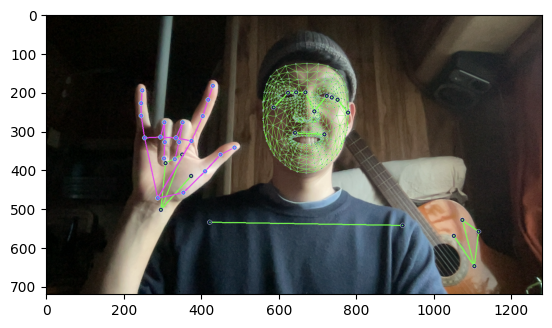

In [72]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # plots single frame with landmarks